# Titanic Data Analysis

## First Step - look over the data

I am going to look over the given data so that I could brainstorm some interesting questions. My guess on Titanic data is 'survivability'. 
  
- **given data file**: titanic-data.csv
- **libraries**: pandas, numpy, matplotlib

In [7]:
%matplotlib inline

import matplotlib as plt
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic-data.csv')

pandas Dataframe has good functions to briefly inspect such as 'head()' or 'describe()'.

In [12]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Here, I just displayed one row (record) or the data to find out what columns are available. I think It is very nice approach to inspect only kinds of columns without actual data for brainstorming. I could be overwhelmed if I have to look through all the records at the first time.

Field Explanation (from Kaggle)
- **survival** : Survival (0 = No, 1 = Yes)
- **pclass** : Ticket class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
- **sex** : Sex
- **Age** : Age in years
- **sibsp** : # of siblings / spouses aboard the Titanic (siblings = brother/sister/stepbrother/stepsister, spouse = husband/wife)
- **parch** : # of parents / children aboard the Titanic (parent = mother/father, child = daughter/son/stepdaughter/stepson)
  - some children travelled only with a nanny, therefore parch=0 for them
- **ticket** : Ticket number
- **fare** : Passenger fare
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Q1. Relationship between Pclass and Survived
### - upper class people tended to be survived with more chance?

In [28]:
mean_survive_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
mean_survive_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

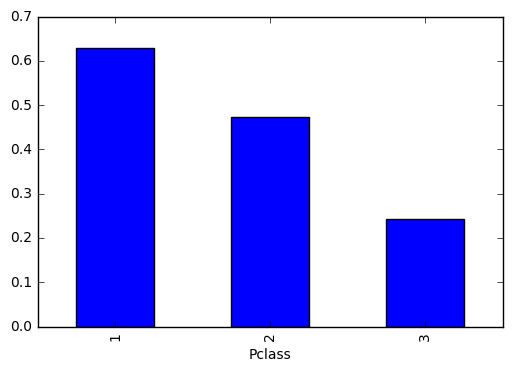

In [29]:
mean_survive_by_class.plot(kind='bar')